In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


# --- Libraries Settings ---
warnings.filterwarnings('ignore')

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
df=pd.read_csv("Heart Disease Dataset.csv")

In [7]:
df.head() #get familier with dataset, display the top 5 data records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns


(303, 14)

In [9]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [14]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0     63    1   3       145   233    1        0      150      0      2.3  ...   
1     37    1   2       130   250    0        1      187      0      3.5  ...   
2     41    0   1       130   204    0        0      172      0      1.4  ...   
3     56    1   1       120   236    0        1      178      0      0.8  ...   
4     57    0   0       120   354    0        1      163      1      0.6  ...   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...   
298   57    0   0       140   241    0        1      123      1      0.2  ...   
299   45    1   3       110   264    0        1      132      0      1.2  ...   
300   68    1   0       144   193    1        1      141      0      3.4  ...   
301   57    1   0       130   131    0        1      115      1      1.2  ...   
302   57    0   1       130   236    0        0      174      0      0.0  ...   

     cp_1  cp_2  cp_3  thal

In [15]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

<AxesSubplot: >

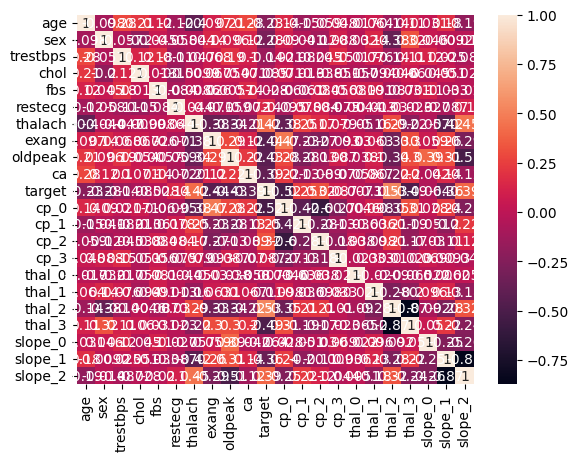

In [16]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [17]:
df.columns 

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [18]:
target_name='target'
y= df[target_name]#given predictions - training data 
X=df.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [19]:
X.head() # contains only independent features 

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
y.head() #contains dependent feature

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
X = MinMaxScaler().fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)#splitting data in 80% train, 20%test

In [23]:
X_train.shape,y_train.shape

((242, 21), (242,))

In [24]:
X_test.shape,y_test.shape

((61, 21), (61,))

# KNN ALGORITHM

In [25]:
from sklearnex.neighbors import NearestNeighbors
from sklearnex import patch_sklearn
patch_sklearn()

#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [26]:
best_model = grid_search.fit(X_train,y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel

In [27]:
knn_pred = best_model.predict(X_test)

In [28]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,knn_pred))

# temp = accuracy_score(y_test,knn_pred)
# acc.append(temp)
# model.append('KNN')

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        32
           1       0.00      0.00      0.00        29

    accuracy                           0.52        61
   macro avg       0.26      0.50      0.34        61
weighted avg       0.28      0.52      0.36        61


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0

 Confusion Matrix:

[[32  0]
 [29  0]]


In [29]:
KNN_pkl_filename = './models/KNN.pkl'# Dump the trained Naive Bayes classifier with Pickle
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(knn_pred, KNN_Model_pkl)
KNN_Model_pkl.close()# Close the pickle instances

# NAIVE BAYES

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearnex import patch_sklearn
patch_sklearn()
# from sklearn.model_selection import GridSearchCV

# param_grid_nb = {
#     'var_smoothing': np.logspace(0,-2, num=100)
# }
# nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
predicted_values = NaiveBayes.predict(X_test)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [33]:
print("Classification Report is:\n",classification_report(y_test,predicted_values))
print("\n F1:\n",f1_score(y_test,predicted_values))
print("\n Precision score is:\n",precision_score(y_test,predicted_values))
print("\n Recall score is:\n",recall_score(y_test,predicted_value))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_value))

# temp =accuracy_score(y_test,nb_pred)
# acc.append(temp)
# model.append('Naive bayes')

# print(acc)
# print(model)

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.88      0.97      0.92        29

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


 F1:
 0.9180327868852458

 Precision score is:
 0.875


NameError: name 'predicted_value' is not defined

In [35]:
NV_pkl_filename = './models/NV.pkl'# Dump the trained Naive Bayes classifier with Pickle
NV_Model_pkl = open(NV_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(predicted_values, NV_Model_pkl)
NV_Model_pkl.close()# Close the pickle instances

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)

In [ ]:
svm_pred=grid_result.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,svm_pred))

In [ ]:
SVM_pkl_filename = './models/SVM.pkl'# Dump the trained Naive Bayes classifier with Pickle
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(svm_pred, SVM_Model_pkl)
SVM_Model_pkl.close()# Close the pickle instances

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)

In [ ]:
dt_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,dt_pred))

In [ ]:
DT_pkl_filename = './models/DecisionTree.pkl'# Dump the trained Naive Bayes classifier with Pickle
DT_Model_pkl = open(DT_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(dt_pred, DT_Model_pkl)
DT_Model_pkl.close()# Close the pickle instances

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train, y_train)

In [ ]:
rf_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,rf_pred))

In [ ]:
RF_pkl_filename = './models/RandomForest.pkl'# Dump the trained Naive Bayes classifier with Pickle
RF_Model_pkl = open(RF_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(rf_pred, RF_Model_pkl)
RF_Model_pkl.close()# Close the pickle instances

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)  

In [ ]:
lr_pred=reg.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,lr_pred))

In [ ]:
LR_pkl_filename = './models/Logistic.pkl'# Dump the trained Naive Bayes classifier with Pickle
LR_Model_pkl = open(LR_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(lr_pred, LR_Model_pkl)
LR_Model_pkl.close()# Close the pickle instances

# GRADIENT BOOSTING

In [ ]:
# --- Applying Gradient Boosting ---
from sklearn.ensemble import GradientBoostingClassifier
from sklearnex import patch_sklearn
patch_sklearn()
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_GB))
print("\n F1:\n",f1_score(y_test,y_pred_GB))
print("\n Precision score is:\n",precision_score(y_test,y_pred_GB))
print("\n Recall score is:\n",recall_score(y_test,y_pred_GB))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_GB))

In [ ]:
GB_pkl_filename = './models/GradientBoosting.pkl'# Dump the trained Naive Bayes classifier with Pickle
GB_Model_pkl = open(GB_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(y_pred_GB, GB_Model_pkl)
GB_Model_pkl.close()# Close the pickle instances

# XG BOOSTING

In [ ]:
import xgboost as xgb
from sklearnex import patch_sklearn
patch_sklearn()
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

XB_pred = XB.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,XB_pred))
print("\n F1:\n",f1_score(y_test,XB_pred))
print("\n Precision score is:\n",precision_score(y_test,XB_pred))
print("\n Recall score is:\n",recall_score(y_test,XB_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,XB_pred))

In [ ]:
XG_pkl_filename = './models/XBoosting.pkl'# Dump the trained Naive Bayes classifier with Pickle
XG_Model_pkl = open(GB_pkl_filename, 'wb')# Open the file to save as pkl file
pickle.dump(XB_pred, XG_Model_pkl)
XG_Model_pkl.close()# Close the pickle instances

In [ ]:
!pip install flask

# MAKING PREDICTION

In [37]:
from sklearnex import patch_sklearn
patch_sklearn()
data = np.array([[64,1,3,110,211,0,0,144,1,1.8,1,0,0,1,0,1,1,0,1,1,0]])
prediction = NaiveBayes.predict(data)
print(prediction)

[1]


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# FLASK DEPLOYMENT

In [ ]:
from flask import Flask, render_template, request, Markup
import numpy as np
import pandas as pd
import requests
import pickle
import io

In [ ]:
app = Flask(__name__)

In [ ]:
heart_pred_path = 'models/NV.pkl'
heart_pred_model = pickle.load(
    open(heart_pred_path, 'rb'))

In [ ]:
@ app.route('/')
def __main__():
    title = 'Heart disease prediction - Home'
    return render_template('index.html', title=title)

In [ ]:
@ app.route('/heart-predict', methods=['POST'])
def heartdisease_prediction():
    title = 'Heart disease prediction'

    if request.method == 'POST':
        age = int(request.form['age'])
        sex = int(request.form['sex'])
        #cp = int(request.form['cp'])
        trestbps = float(request.form['trestbps'])
        chol = float(request.form['chol'])
        fbs = float(request.form['fbs'])
        restecg = float(request.form['restecg'])
        thalach = float(request.form['thalach'])
        exang = float(request.form['exang'])
        oldpeak = float(request.form['oldpeak'])
        #slope = float(request.form['ph'])
        ca = float(request.form['ca'])
        #thal = float(request.form['thal'])
        
        data = np.array([[age, sex, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, ca, target]])
        my_prediction = heart_pred_model.predict(data)
        final_prediction = my_prediction[0]

        return render_template('index-results.html', prediction=final_prediction, title=title)

In [ ]:
if __name__ == '__main__':
    app.run(debug=False)